In [1]:
# Load required libraries
import geopandas as gpd
import numpy as np
import os
import fiona
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from shapely.ops import unary_union
from unidecode import unidecode
import glob
import csv
from datetime import datetime
import dask.dataframe as dd
import dask_geopandas as dg
from dask.distributed import Client

c:\Users\ubach\.conda\envs\geospatial_ETC_DI_v4\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
Q:\UserTemp\ubach\AppData\Local\Temp\63\ipykernel_186048\3790075737.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (http

In [2]:
def write_log(log_path, log_entry):
    # Check if the file exists to determine if headers need to be written
    file_exists = os.path.isfile(log_path)

    # Open the log file in append mode
    with open(log_path, 'a', newline='') as csvfile:
        log_writer = csv.writer(csvfile)

        # Write the header if the file is new
        if not file_exists:
            log_writer.writerow(['Timestamp', 'HDENS_NAME', 'agglo_Id', 'uc_km2', 'agl_city_km2', 'ncm_agl_city_km2', 
                                 'ua_km2', 'uagreen_km2', 'uagreen_urbc_km2', 'nqgreen_m2', 'green_not_covered_by_ncm_m2',
                                  'GQA_m2', 'GNA_m2', 'prDuration'])

        # Write the log entry
        log_writer.writerow(log_entry)

def create_log_entry(val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, val11, val12, processing_time):
    timestamp = datetime.now().strftime('%Y%m%d_%Hh%Mm%Ss')
    processing_duration = str(processing_time)
    return [timestamp, val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, val11, val12, processing_duration]


### Test reading data

In [7]:
pip install pyogrio


     --------------------------------------- 15.9/15.9 MB 34.4 MB/s eta 0:00:00


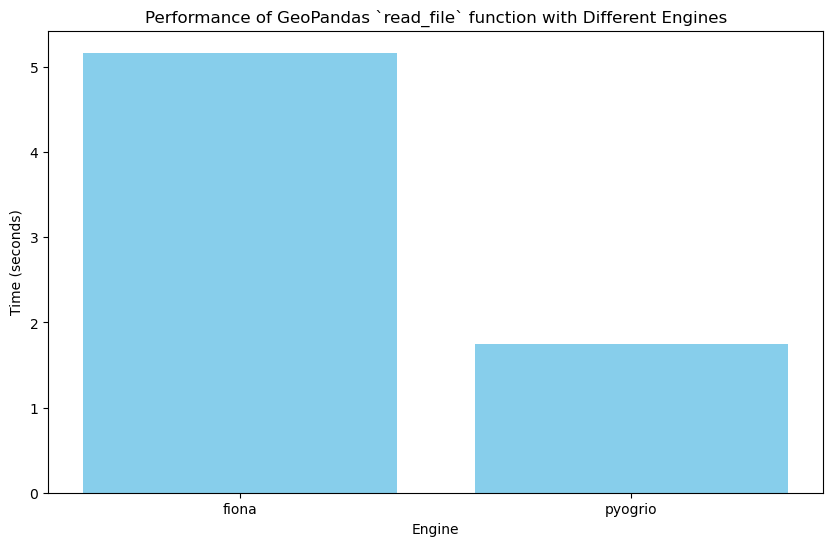

In [2]:
import time
import matplotlib.pyplot as plt
import geopandas as gpd


indata_f = r'P:\Environment and Health\Noise\ServiceContract\2024_ServiceContract\QuietAreas'
ctry_code = 'LT'
ncm_file_path = os.path.join(indata_f, 'NoiseData', f'Noise_20202025_export_{ctry_code}.gpkg')
layerName = f'dbodf48_agg_noisecontours_roadsinagglomeration_lden_valid_latestdelivery_poly_{ctry_code}'

engines = {
    'fiona': {'engine': 'fiona'},
    'pyogrio': {'engine': 'pyogrio'}
          
}

times = []
for engine in engines:
    start_time = time.time()
    gdf = gpd.read_file(ncm_file_path, layer=layerName, **engines[engine])
    end_time = time.time()

    times.append(end_time - start_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(engines.keys(), times, color='skyblue')
plt.xlabel('Engine')
plt.ylabel('Time (seconds)')
plt.title('Performance of GeoPandas `read_file` function with Different Engines')
plt.show()

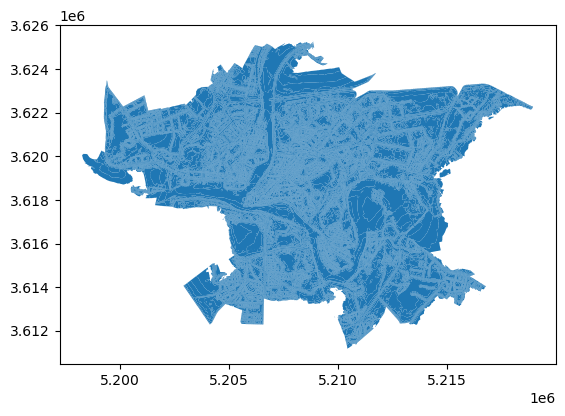

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plotting the GeoDataFrame
gdf = gpd.read_file(ncm_file_path, layer=layerName, engine='pyogrio')
gdf.plot()
plt.show()


In [5]:
gdf

,id_0,id,measureTime_beginPosition,measureTime_endPosition,category,source,sourceIdentifier,reportNetEnvelopeFileId,countryCode,geometry_error_description,latestDelivery,status,geometry
0,1,60201,NaT,NaT,LdenLowerThan40,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5215179.543 3621207.333, 52151..."
1,2,60202,NaT,NaT,LdenLowerThan40,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5200261.108 3621747.573, 52002..."
2,3,60203,NaT,NaT,LdenLowerThan40,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5211290.944 3612078.395, 52112..."
3,4,60204,NaT,NaT,LdenLowerThan40,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5199699.320 3621473.095, 51996..."
4,5,60205,NaT,NaT,LdenLowerThan40,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5216184.465 3613984.531, 52161..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,15617,50196,NaT,NaT,Lden4044,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5208314.259 3620582.057, 52083..."
15617,15618,50197,NaT,NaT,Lden4044,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5209748.686 3613562.795, 52097..."
15618,15619,50198,NaT,NaT,Lden4044,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5209339.352 3617042.959, 52093..."
15619,15620,50199,NaT,NaT,Lden4044,roadsInAgglomeration,2024-01-11T11:01:34Z //cifs_svm13/noise/Report...,1406,LT,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((5217374.061 3622689.681, 52173..."


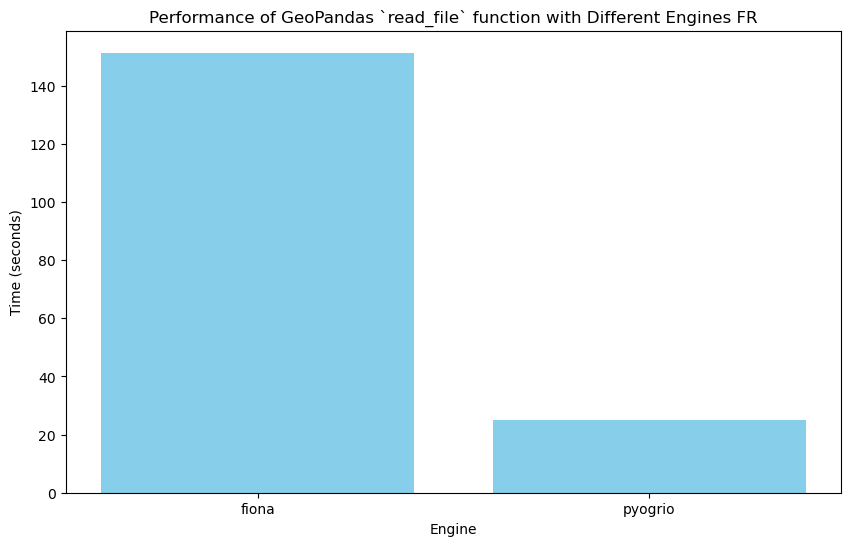

In [8]:
import time
import matplotlib.pyplot as plt
import geopandas as gpd


indata_f = r'P:\Environment and Health\Noise\ServiceContract\2024_ServiceContract\QuietAreas'
ctry_code = 'FR'
ncm_file_path = os.path.join(indata_f, 'NoiseData', f'Noise_20202025_export.gpkg')
layerName = f'dbo.DF48_agg_NoiseContours_roadsInAgglomeration_Lden_Valid_LatestDelivery_Poly_{ctry_code}'

engines = {
    'fiona': {'engine': 'fiona'},
    'pyogrio': {'engine': 'pyogrio'}
          
}

times = []
for engine in engines:
    start_time = time.time()
    gdf = gpd.read_file(ncm_file_path, layer=layerName, **engines[engine])
    end_time = time.time()

    times.append(end_time - start_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(engines.keys(), times, color='skyblue')
plt.xlabel('Engine')
plt.ylabel('Time (seconds)')
plt.title(f'Performance of GeoPandas `read_file` function with Different Engines {ctry_code}')
plt.show()

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plotting the GeoDataFrame
gdf = gpd.read_file(ncm_file_path, layer=layerName, engine='pyogrio')
gdf

,id,measureTime_beginPosition,measureTime_endPosition,category,source,sourceIdentifier,reportNetEnvelopeFileId,countryCode,geometry_error_description,latestDelivery,status,geometry
0,1,NaT,NaT,Lden5559,roadsInAgglomeration,2023-06-14T08:45:47Z //cifs_svm13/noise/Report...,1270,FR,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3915419.118 2550464.790, 39154..."
1,2,NaT,NaT,Lden5559,roadsInAgglomeration,2023-06-14T08:45:47Z //cifs_svm13/noise/Report...,1270,FR,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3915466.307 2550430.278, 39154..."
2,3,NaT,NaT,Lden5559,roadsInAgglomeration,2023-06-14T08:45:47Z //cifs_svm13/noise/Report...,1270,FR,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3915486.259 2550428.424, 39154..."
3,4,NaT,NaT,Lden5559,roadsInAgglomeration,2023-06-14T08:45:47Z //cifs_svm13/noise/Report...,1270,FR,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3915496.235 2550427.497, 39155..."
4,5,NaT,NaT,Lden5559,roadsInAgglomeration,2023-06-14T08:45:47Z //cifs_svm13/noise/Report...,1270,FR,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3915486.259 2550428.424, 39154..."
...,...,...,...,...,...,...,...,...,...,...,...,...
223464,1,NaT,NaT,Lden5559,roadsInAgglomeration,2023-11-30T10:26:10Z //cifs_svm13/noise/Report...,1270,FR,Not valid because of two overlapping edges in ...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3638262.635 2582237.513, 36383..."
223465,2,NaT,NaT,Lden6064,roadsInAgglomeration,2023-11-30T10:26:10Z //cifs_svm13/noise/Report...,1270,FR,Not valid because of two overlapping edges in ...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3638290.024 2582207.065, 36382..."
223466,3,NaT,NaT,Lden6569,roadsInAgglomeration,2023-11-30T10:26:10Z //cifs_svm13/noise/Report...,1270,FR,Not valid because polygon ring (20) intersects...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3638293.973 2582195.216, 36382..."
223467,4,NaT,NaT,Lden7074,roadsInAgglomeration,2023-11-30T10:26:10Z //cifs_svm13/noise/Report...,1270,FR,Not valid because polygon ring (307) intersect...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3638281.257 2582184.272, 36382..."


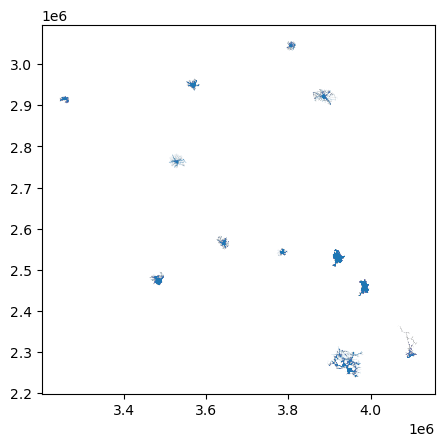

In [12]:
gdf.plot()
plt.show()

## Test filter reading by columns

In [24]:
indata_f = r'P:\Environment and Health\Noise\ServiceContract\2024_ServiceContract\QuietAreas'
ctry_code = 'FR'
file_path = os.path.join(indata_f, 'NoiseData', f'Noise_20202025_export.gpkg')
layerName = f'dbo.DF48_agg_NoiseContours_roadsInAgglomeration_Lden_Valid_LatestDelivery_Poly_{ctry_code}'


Text(0.5, 1.0, 'Different masking times')

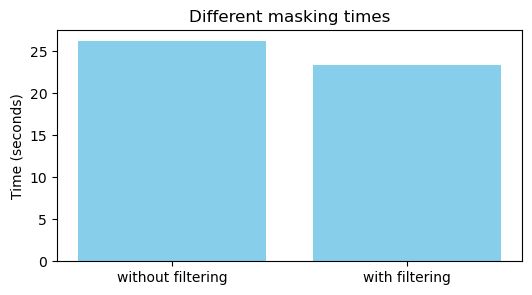

In [30]:
engines = {
    'fiona': {'engine': 'fiona'},
    'pyogrio': {'engine': 'pyogrio'},
    'pyogrio+arrow': {'engine': 'pyogrio', 'use_arrow': True}
          
}

times = []

# without tabular filtering
start_time = time.time()
gdf1 = gpd.read_file(ncm_file_path, layer=layerName, **engines['pyogrio+arrow'])
end_time = time.time()
times.append(end_time - start_time)

# with tabular filtering
start_time = time.time()
gdf2 = gpd.read_file(ncm_file_path, layer=layerName,**engines['pyogrio+arrow'], columns=['category', 'geometry'])
end_time = time.time()
times.append(end_time - start_time)

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(['without filtering', 'with filtering'], times, color='skyblue')
ax.set_ylabel('Time (seconds)')
ax.set_title('Different masking times')

## Test filter reading by mask

In [17]:
agls_file_path = os.path.join(indata_f, 'NoiseData', 'DF1_5_Agglomerations_20240429.gpkg')
# Read the GeoPackage file
agls = gpd.read_file(agls_file_path, layer = 'dbo.DF15_AgglomerationSource_Valid_LatestDelivery')
agl_city = agls.query(f'agglomerationName_localName == "Bordeaux"')

Text(0.5, 1.0, 'Final dataset')

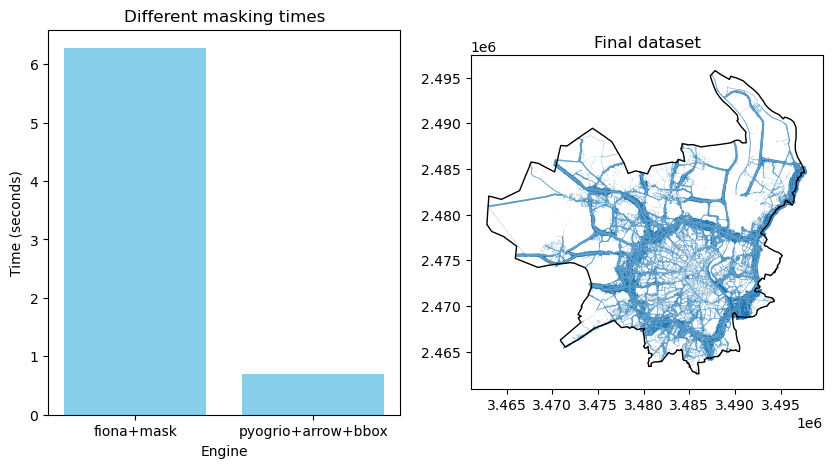

In [31]:
# setup the scenarios
engines = {
    'fiona+mask': {'engine': 'fiona', 'mask': agl_city},
    'pyogrio+arrow+bbox': {'engine': 'pyogrio', 'use_arrow': True, 'bbox': tuple(agl_city.total_bounds)}
}

# loop through the scenarios
times = []
for engine in engines:
    start_time = time.time()
    df = gpd.read_file(file_path, layer=layerName, **engines[engine])
    end_time = time.time()
    times.append(end_time - start_time)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(engines.keys(), times, color='skyblue')
axs[0].set_xlabel('Engine')
axs[0].set_ylabel('Time (seconds)')
axs[0].set_title('Different masking times')

agl_city.plot(ax=axs[1], facecolor='none')
df.plot(ax=axs[1], zorder=-1, linewidth=0.5)
axs[1].set_title('Final dataset')

In [32]:
df

,id,measureTime_beginPosition,measureTime_endPosition,category,source,sourceIdentifier,reportNetEnvelopeFileId,countryCode,geometry_error_description,latestDelivery,status,geometry
0,65719,NaT,NaT,Lden5559,roadsInAgglomeration,2023-06-14T12:03:32Z //cifs_svm13/noise/Report...,1270,FR,Not valid because of two overlapping edges in ...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3487482.480 2495383.601, 34874..."
1,65720,NaT,NaT,Lden6064,roadsInAgglomeration,2023-06-14T12:03:32Z //cifs_svm13/noise/Report...,1270,FR,Not valid because of two overlapping edges in ...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3489169.833 2493951.712, 34891..."
2,65721,NaT,NaT,Lden6569,roadsInAgglomeration,2023-06-14T12:03:32Z //cifs_svm13/noise/Report...,1270,FR,Not valid because of two overlapping edges in ...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3487471.536 2495361.087, 34874..."
3,65722,NaT,NaT,Lden7074,roadsInAgglomeration,2023-06-14T12:03:32Z //cifs_svm13/noise/Report...,1270,FR,Not valid because polygon ring (316) intersect...,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3490153.762 2493507.859, 34901..."
4,65723,NaT,NaT,LdenGreaterThan75,roadsInAgglomeration,2023-06-14T12:03:32Z //cifs_svm13/noise/Report...,1270,FR,Valid,1,TECHNICALLY_ACCEPTED,"MULTIPOLYGON (((3492783.025 2486067.328, 34927..."


#### Same test for Kaunas

In [33]:
agls_file_path = os.path.join(indata_f, 'NoiseData', 'DF1_5_Agglomerations_20240429.gpkg')
# Read the GeoPackage file
agls = gpd.read_file(agls_file_path, layer = 'dbo.DF15_AgglomerationSource_Valid_LatestDelivery')
agl_city = agls.query(f'agglomerationName_localName == "Kaunas"')

In [34]:
indata_f = r'P:\Environment and Health\Noise\ServiceContract\2024_ServiceContract\QuietAreas'
ctry_code = 'LT'
file_path = os.path.join(indata_f, 'NoiseData', f'Noise_20202025_export.gpkg')
layerName = f'dbo.DF48_agg_NoiseContours_roadsInAgglomeration_Lden_Valid_LatestDelivery_Poly_{ctry_code}'

Text(0.5, 1.0, 'Final dataset')

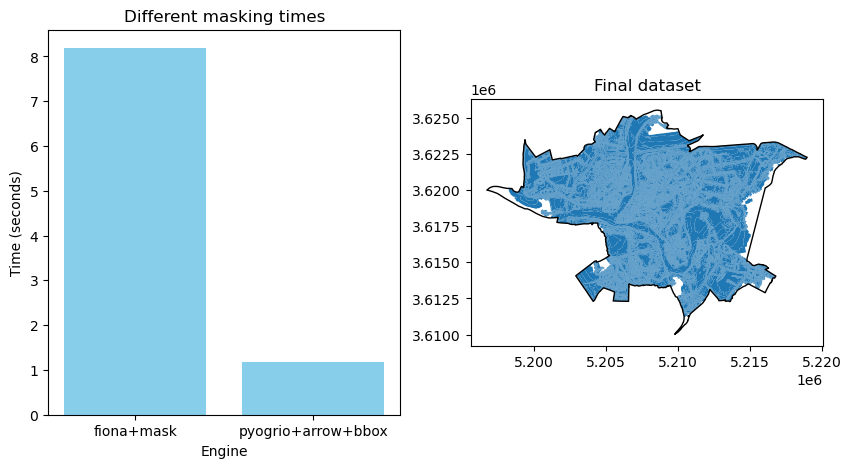

In [35]:
# setup the scenarios
engines = {
    'fiona+mask': {'engine': 'fiona', 'mask': agl_city},
    'pyogrio+arrow+bbox': {'engine': 'pyogrio', 'use_arrow': True, 'bbox': tuple(agl_city.total_bounds)}
}

# loop through the scenarios
times = []
for engine in engines:
    start_time = time.time()
    df = gpd.read_file(file_path, layer=layerName, **engines[engine])
    end_time = time.time()
    times.append(end_time - start_time)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(engines.keys(), times, color='skyblue')
axs[0].set_xlabel('Engine')
axs[0].set_ylabel('Time (seconds)')
axs[0].set_title('Different masking times')

agl_city.plot(ax=axs[1], facecolor='none')
df.plot(ax=axs[1], zorder=-1, linewidth=0.5)
axs[1].set_title('Final dataset')

## Testing overlay times

In [36]:
ncm = gpd.read_file(file_path, layer=layerName, columns=['category', 'geometry'], engine='pyogrio', use_arrow=True, bbox= tuple(agl_city.total_bounds))

In [37]:
ncm

,category,geometry
0,LdenLowerThan40,"MULTIPOLYGON (((5215179.543 3621207.333, 52151..."
1,LdenLowerThan40,"MULTIPOLYGON (((5200261.108 3621747.573, 52002..."
2,LdenLowerThan40,"MULTIPOLYGON (((5211290.944 3612078.395, 52112..."
3,LdenLowerThan40,"MULTIPOLYGON (((5199699.320 3621473.095, 51996..."
4,LdenLowerThan40,"MULTIPOLYGON (((5216184.465 3613984.531, 52161..."
...,...,...
15616,Lden4044,"MULTIPOLYGON (((5208314.259 3620582.057, 52083..."
15617,Lden4044,"MULTIPOLYGON (((5209748.686 3613562.795, 52097..."
15618,Lden4044,"MULTIPOLYGON (((5209339.352 3617042.959, 52093..."
15619,Lden4044,"MULTIPOLYGON (((5217374.061 3622689.681, 52173..."


In [39]:
times = []

# without tabular filtering
start_time = time.time()

ncm_dis = ncm
# Define the list of noisy classes
noisy_classes = ['Lden5559', 'Lden6064', 'Lden6569', 'Lden7074', 'LdenGreaterThan75']

# Create a condition based on the category column
condition = ncm_dis['category'].isin(noisy_classes)  # Replace 'category_column' with the actual column name

# Specify the condition and create a new category column based on the condition
ncm_dis['noisy'] = 0
ncm_dis.loc[condition, 'noisy'] = 1
ncm_dis = ncm_dis[['noisy', 'geometry']]
ncm_dis_dg = dg.from_geopandas(ncm_dis, npartitions=10)
ncm_dis = ncm_dis_dg.dissolve(by='noisy').compute().reset_index()
print ("ncm_dis")
end_time = time.time()
times.append(end_time - start_time)


ncm_dis


In [43]:
# without tabular filtering
start_time = time.time()
ncm_dis = ncm
ncm_dis['geometry'] = ncm['geometry'].simplify(tolerance=0.01)
# Define the list of noisy classes
noisy_classes = ['Lden5559', 'Lden6064', 'Lden6569', 'Lden7074', 'LdenGreaterThan75']

# Create a condition based on the category column
condition = ncm_dis['category'].isin(noisy_classes)  # Replace 'category_column' with the actual column name

# Specify the condition and create a new category column based on the condition
ncm_dis['noisy'] = 0
ncm_dis.loc[condition, 'noisy'] = 1
ncm_dis = ncm_dis[['noisy', 'geometry']]
ncm_dis_dg = dg.from_geopandas(ncm_dis, npartitions=10)
ncm_dis = ncm_dis_dg.dissolve(by='noisy').compute().reset_index()
print ("ncm_dis")
end_time = time.time()
times.append(end_time - start_time)

ncm_dis


Text(0.5, 1.0, 'Different dissolve times')

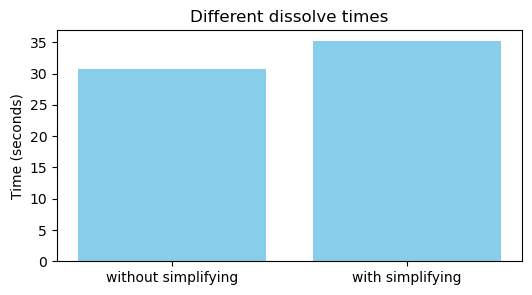

In [44]:
# Plotting
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(['without simplifying', 'with simplifying'], times, color='skyblue')
ax.set_ylabel('Time (seconds)')
ax.set_title('Different dissolve times')

In [45]:
ncm_dis

,noisy,geometry
0,0,"MULTIPOLYGON (((5201599.796 3618395.944, 52015..."
1,1,"MULTIPOLYGON (((5200896.291 3618301.588, 52008..."


In [47]:
def overlay(left, right):
    return (
        left.sjoin(right.assign(right_geometry=right.geometry))
        .assign(geometry=lambda x: x.geometry.intersection(x.right_geometry))
        .drop(columns="right_geometry")
    )

Text(0.5, 1.0, 'Different overlay (intersection) times')

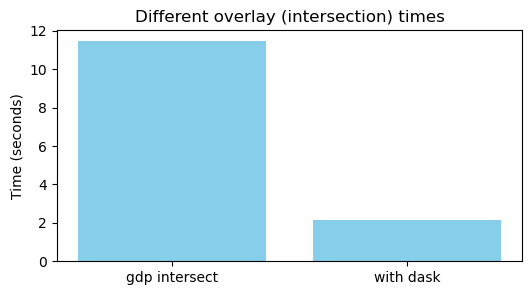

In [54]:
times = []

# gdp overlay - intersection
start_time = time.time()
ncm_agl = gpd.overlay(ncm, agl_city, how='intersection')
end_time = time.time()
times.append(end_time - start_time)

# gdp overlay - intersection
start_time = time.time()
ncm_dg = dg.from_geopandas(ncm, npartitions=10)
ncm_dg_agl = overlay(ncm_dg, agl_city).compute()
end_time = time.time()
times.append(end_time - start_time)

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(['gdp intersect', 'with dask'], times, color='skyblue')
ax.set_ylabel('Time (seconds)')
ax.set_title('Different overlay (intersection) times')

In [52]:
ncm_dg_agl.compute()


,category,geometry,noisy,index_right,agglomerationId_identifier,id,agglomerationName_localName,agglomerationName_localNameLanguage,agglomerationName_nameEng,size,...,applicableSource,inspireId_localId,inspireId_namespace,inspireId_versionId,sourceIdentifier,reportNetEnvelopeFileId,countryCode,geometry_error_description,latestDelivery,dateReleased
0,LdenLowerThan40,"POLYGON ((5215178.879 3621206.329, 5215169.260...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
1,LdenLowerThan40,"POLYGON ((5200257.595 3621739.304, 5200248.002...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
2,LdenLowerThan40,"POLYGON ((5211282.582 3612068.869, 5211278.454...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
3,LdenLowerThan40,"POLYGON ((5199692.538 3621461.993, 5199686.692...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
4,LdenLowerThan40,"POLYGON ((5216180.793 3613975.451, 5216172.478...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,Lden4044,"POLYGON ((5208318.188 3620578.645, 5208315.909...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
15617,Lden4044,"POLYGON ((5209760.107 3613544.606, 5209757.013...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
15618,Lden4044,"POLYGON ((5209342.830 3617039.809, 5209343.140...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41
15619,Lden4044,"POLYGON ((5217372.266 3622692.995, 5217374.217...",0,191,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,...,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41


In [53]:
ncm_agl

,category,noisy,agglomerationId_identifier,id,agglomerationName_localName,agglomerationName_localNameLanguage,agglomerationName_nameEng,size,numberOfInhabitants,applicableSource,inspireId_localId,inspireId_namespace,inspireId_versionId,sourceIdentifier,reportNetEnvelopeFileId,countryCode,geometry_error_description,latestDelivery,dateReleased,geometry
0,LdenLowerThan40,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5215178.879 3621206.329, 5215169.260..."
1,LdenLowerThan40,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5200257.595 3621739.304, 5200248.002..."
2,LdenLowerThan40,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5211282.582 3612068.869, 5211278.454..."
3,LdenLowerThan40,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5199692.538 3621461.993, 5199686.692..."
4,LdenLowerThan40,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5216180.793 3613975.451, 5216172.478..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,Lden4044,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5208318.188 3620578.645, 5208315.909..."
15617,Lden4044,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5209760.107 3613544.606, 5209757.013..."
15618,Lden4044,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5209342.830 3617039.809, 5209343.140..."
15619,Lden4044,0,LT_a_ag0002,7,Kaunas,lit,Kaunas,156.947852,298753,agglomerationRoad; agglomerationRailway; agglo...,LT_a_ag0002,end_agglomeration_LT,None,2024-01-17T14:50:37Z \kongoni-a.eea.dmz1fmeser...,1590,LT,Valid,1,2024-03-11 17:22:41,"POLYGON ((5217372.266 3622692.995, 5217374.217..."


In [55]:
from multiprocessing import Pool

Text(0.5, 1.0, 'Different overlay (intersection) times')

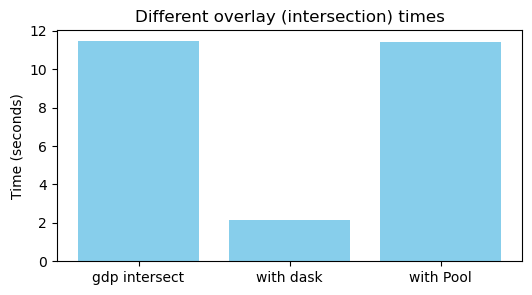

In [57]:
# gdp overlay - with Pool
start_time = time.time()
with Pool(10) as pool:
    ncm_agl = gpd.overlay(ncm, agl_city, how='intersection')
    pass
pool.close()
end_time = time.time()
times.append(end_time - start_time)

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(['gdp intersect', 'with dask', 'with Pool'], times, color='skyblue')
ax.set_ylabel('Time (seconds)')
ax.set_title('Different overlay (intersection) times')
